<a href="https://colab.research.google.com/github/Infinity1008/Notebooks/blob/main/Bankdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank_data_clean.xlsx to bank_data_clean.xlsx


In [5]:
import pandas as pd

In [6]:
df = pd.read_excel('bank_data_clean.xlsx')

In [7]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [8]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


In [9]:
df.groupby('education').mean()[['balance']]

,balance
education,
primary,1411.544248
secondary,1196.814397
tertiary,1775.423704
unknown,1701.245989


In [10]:
temp = df.groupby('education').mean()[['balance']]

In [11]:
temp

,balance
education,
primary,1411.544248
secondary,1196.814397
tertiary,1775.423704
unknown,1701.245989


In [12]:
temp.columns

Index(['balance'], dtype='object')

In [13]:
temp['education'] = temp.index

In [14]:
temp

,balance,education
education,,
primary,1411.544248,primary
secondary,1196.814397,secondary
tertiary,1775.423704,tertiary
unknown,1701.245989,unknown


In [15]:
temp.reset_index(level=0, inplace=True)

ValueError: ignored

In [16]:
# Write code that tells us who has the highest average balance, with respect to different education backgrounds
temp

,balance,education
education,,
primary,1411.544248,primary
secondary,1196.814397,secondary
tertiary,1775.423704,tertiary
unknown,1701.245989,unknown


In [17]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [18]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


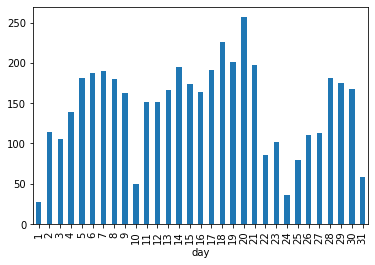

In [19]:
# Which week was the most busiest 
df.groupby('day').count()['age'].plot(kind='bar')

In [20]:
def which_week(x):
  if x <= 7:
    return 1
  elif x>7 and x<=14:
    return 2
  elif x>14 and x<=21:
    return 3
  elif x>21 and x<=28:
    return 4
  else:
    return 5    

In [21]:
which_week(24)

4

In [22]:
df['week'] = df['day'].apply(which_week)

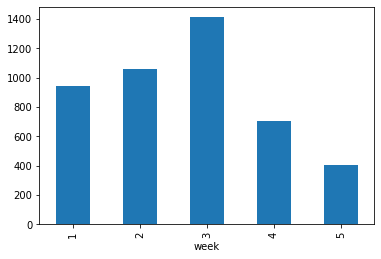

In [23]:
df.groupby('week').count()['age'].plot(kind='bar')

In [24]:
temp = df.groupby('week').count()[['age']]

In [ ]:
temp

In [25]:
temp.reset_index(level=0, inplace=True)

In [26]:
temp

,week,age
0,1,943
1,2,1057
2,3,1411
3,4,708
4,5,402


In [27]:
df.shape

(4521, 18)

In [28]:
# Which week did you see the most customers, make a dataframe with ascending rows

In [29]:
temp = df.groupby('month').count()[['age']]

In [30]:
temp

,age
month,
apr,293
aug,633
dec,20
feb,222
jan,148
jul,706
jun,531
mar,49
may,1398


In [31]:
temp.reset_index(level=0, inplace=True)

In [32]:
temp.sort_values('age',ascending=False)

,month,age
8,may,1398
5,jul,706
1,aug,633
6,jun,531
9,nov,389
0,apr,293
3,feb,222
4,jan,148
10,oct,80
11,sep,52


In [33]:
temp

,month,age
0,apr,293
1,aug,633
2,dec,20
3,feb,222
4,jan,148
5,jul,706
6,jun,531
7,mar,49
8,may,1398
9,nov,389


In [34]:
temp = temp.rename(columns={'month': 'month', 'age': 'count'})

In [35]:
temp

,month,count
0,apr,293
1,aug,633
2,dec,20
3,feb,222
4,jan,148
5,jul,706
6,jun,531
7,mar,49
8,may,1398
9,nov,389
